# Get necessary libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Get Data

In [137]:
df = pd.read_csv("Covid live.csv")
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    int64  
 1   Country,
Other     230 non-null    object 
 2   Total
Cases        230 non-null    object 
 3   Total
Deaths       225 non-null    object 
 4   New
Deaths         3 non-null      float64
 5   Total
Recovered    214 non-null    object 
 6   Active
Cases       215 non-null    object 
 7   Serious,
Critical  147 non-null    object 
 8   Tot Cases/
1M pop  228 non-null    object 
 9   Deaths/
1M pop     223 non-null    object 
 10  Total
Tests        214 non-null    object 
 11  Tests/
1M pop      214 non-null    object 
 12  Population         228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


In [139]:
df.isnull().sum()

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

In [140]:
df.duplicated().sum()

0

In [141]:
df.describe()
#this shows only New death is in the right dtype, hence the reason it is the only output got descibe

,#,New\nDeaths
count,230.000000,3.0
mean,115.500000,18.0
std,66.539462,21.0
min,1.000000,3.0
25%,58.250000,6.0
50%,115.500000,9.0
75%,172.750000,25.5
max,230.000000,42.0


# Coverting each column to the correct dtype.

From the df.info we can see that the column are not in the correct type, 11 columns which are integers are of the object type, 1 column which is also integer is of the float type. the next step is to put them in the right dtype.
Step 1 : Remove the commas
Step 2: Treat the missing values
Step 3: Covert object dtypes to intergers

In [142]:
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [143]:
df.dtypes

#                       int64
Country,\nOther        object
Total\nCases           object
Total\nDeaths          object
New\nDeaths           float64
Total\nRecovered       object
Active\nCases          object
Serious,\nCritical     object
Tot Cases/\n1M pop     object
Deaths/\n1M pop        object
Total\nTests           object
Tests/\n1M pop         object
Population             object
dtype: object

In [144]:
#The first step is to remove all the commas seperating the numbers, step to is to convert from object to int
df.replace(',','', regex=True, inplace=True)

In [145]:
df
#Commas removed

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282,NaN,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,NaN,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,NaN,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,NaN,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,NaN,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,49322,NaN,NaN,NaN,1622
226,227,Vatican City,29,NaN,NaN,29,0,NaN,36295,NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,1658,NaN,NaN,NaN,12066
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,626161


In [146]:
#Treating the missing values
df["Total\nDeaths"].fillna(method ="bfill", inplace = True)
df["Total\nRecovered"].fillna(method = "ffill", inplace = True)
df["Active\nCases"].fillna(method = "bfill", inplace = True)
df["Serious,\nCritical"].fillna(method = "ffill", inplace = True)
df["Tot Cases/\n1M pop"].fillna(method = "ffill", inplace = True)
df["Deaths/\n1M pop"].fillna(method= "ffill", inplace = True)
df["Total\nTests"].fillna(method="ffill", inplace = True)
df["Tests/\n1M pop"].fillna(method ="ffill", inplace = True)
df["Population"].fillna(method = "ffill", inplace = True)

#missing values in New death are way too much i will just drop the column
df.drop('New\nDeaths',axis=1, inplace = True)
df


,#,"Country,\nOther",Total\nCases,Total\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,1,80,0,1,49322,637,20508,1867419,1622
226,227,Vatican City,29,1,29,0,1,36295,637,20508,1867419,799
227,228,Tuvalu,20,1,29,20,1,1658,637,20508,1867419,12066
228,229,Western Sahara,10,1,9,0,1,16,2,20508,1867419,626161


In [147]:
# because the # column is not useful for analysis as it is jus a row number i will als drop it
df.drop('#',axis=1, inplace = True)

In [148]:
df.isnull().sum()

Country,\nOther       0
Total\nCases          0
Total\nDeaths         0
Total\nRecovered      0
Active\nCases         0
Serious,\nCritical    0
Tot Cases/\n1M pop    0
Deaths/\n1M pop       0
Total\nTests          0
Tests/\n1M pop        0
Population            0
dtype: int64

In [149]:
df['Total\nCases'] = df['Total\nCases'].astype(dtype='int64')
df['Total\nDeaths'] = df['Total\nDeaths'].astype(dtype='int64')
df['Total\nRecovered'] = df['Total\nRecovered'].astype(dtype='int64')
df['Active\nCases'] = df['Active\nCases'].astype(dtype='int64')
df['Serious,\nCritical'] = df['Serious,\nCritical'].astype(dtype='int64')
df['Tot Cases/\n1M pop'] = df['Tot Cases/\n1M pop'].astype(dtype='int64')
df['Deaths/\n1M pop'] = df['Deaths/\n1M pop'].astype(dtype='int64')
df['Total\nTests'] = df['Total\nTests'].astype(dtype='int64')
df['Tests/\n1M pop'] = df['Tests/\n1M pop'].astype(dtype='int64')
df['Population'] = df['Population'].astype(dtype='int64')



In [150]:
df.dtypes


#AWESOME!!! everything is in the right dtype now

Country,\nOther       object
Total\nCases           int64
Total\nDeaths          int64
Total\nRecovered       int64
Active\nCases          int64
Serious,\nCritical     int64
Tot Cases/\n1M pop     int64
Deaths/\n1M pop        int64
Total\nTests           int64
Tests/\n1M pop         int64
Population             int64
dtype: object

In [151]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total\nCases,230.0,2.705969e+06,8.779899e+06,9.0,23649.00,203711.0,1256286.00,9.816690e+07
Total\nDeaths,230.0,2.846570e+04,1.011811e+05,1.0,184.00,1951.5,13272.00,1.084282e+06
Total\nRecovered,230.0,2.623815e+06,8.528611e+06,2.0,19683.25,180858.0,1214962.50,9.496211e+07
Active\nCases,230.0,5.401131e+04,2.009060e+05,0.0,139.00,1211.5,18341.75,2.120510e+06
"Serious,\nCritical",230.0,1.947435e+02,7.683041e+02,1.0,3.00,8.0,47.00,8.318000e+03
Tot Cases/\n1M pop,230.0,1.783613e+05,1.821035e+05,16.0,16837.50,116040.0,292559.75,7.039590e+05
Deaths/\n1M pop,230.0,1.180357e+03,1.234589e+03,2.0,165.75,749.0,1896.75,6.429000e+03
Total\nTests,230.0,2.948293e+07,1.106785e+08,5117.0,249033.50,1806407.5,11477413.00,1.118159e+09
Tests/\n1M pop,230.0,2.011562e+06,3.380421e+06,5091.0,190368.50,890956.5,2292301.00,2.200494e+07
Population,230.0,3.454596e+07,1.383526e+08,799.0,469319.50,5676382.5,21971089.00,1.448471e+09


# Exploratory Data Analysis
## Univariate.

In [152]:
df["Country,\nOther"].value_counts()

USA                   1
Sudan                 1
Cabo Verde            1
Bhutan                1
Syria                 1
                     ..
Kuwait                1
Dominican Republic    1
Myanmar               1
Palestine             1
MS Zaandam            1
Name: Country,\nOther, Length: 230, dtype: int64

<AxesSubplot:xlabel='Total\nCases'>

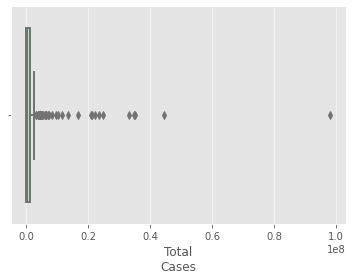

In [153]:
plt.style.use('ggplot')
sns.boxplot(x="Total\nCases",data=df,palette='rainbow') 
#this data is extremely positively skewed due to heavy presence of outliers

<AxesSubplot:>

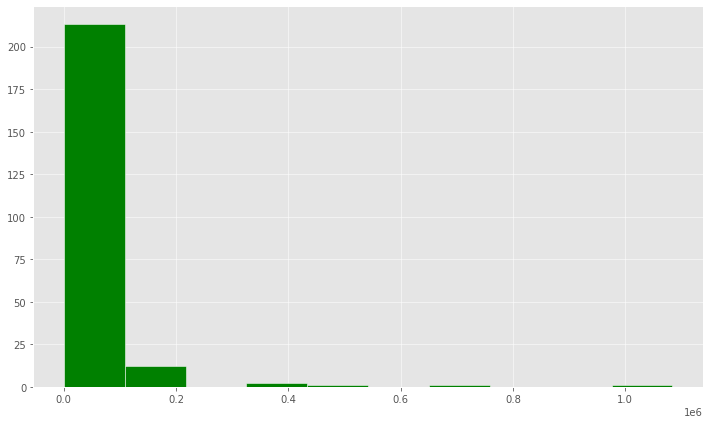

In [154]:
plt.style.use('ggplot')
df["Total\nDeaths"].hist(color= "green",edgecolor= "white",figsize=(12,7)) 
#Skewed due to the extreme prensence of outlier

<AxesSubplot:>

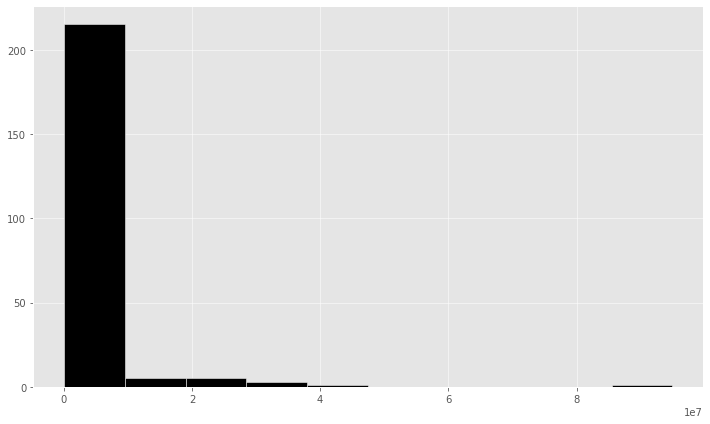

In [155]:
plt.style.use('ggplot')
df["Total\nRecovered"].hist(color= "black",edgecolor= "white",figsize=(12,7)) 

<AxesSubplot:>

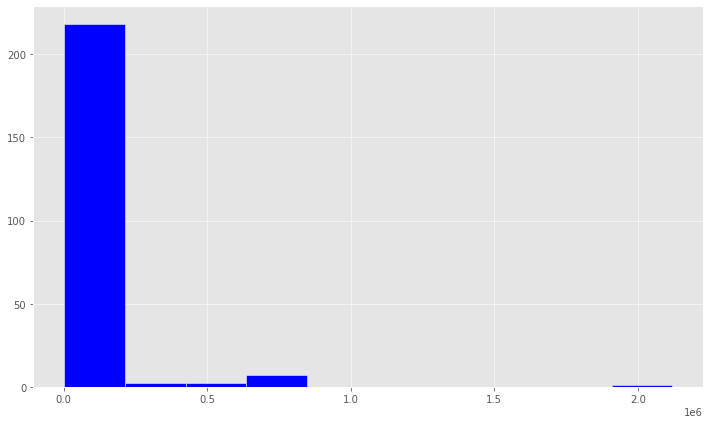

In [156]:
plt.style.use('ggplot')
df["Active\nCases"].hist(color= "blue",edgecolor= "white",figsize=(12,7)) 

<AxesSubplot:>

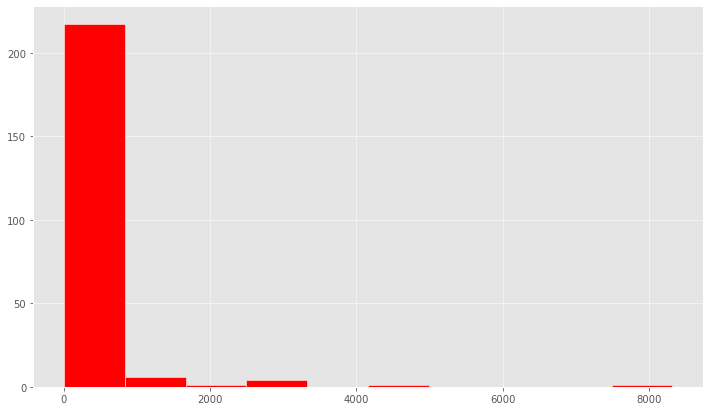

In [157]:
plt.style.use('ggplot')
df["Serious,\nCritical"].hist(color= "red",edgecolor= "white",figsize=(12,7))

<AxesSubplot:>

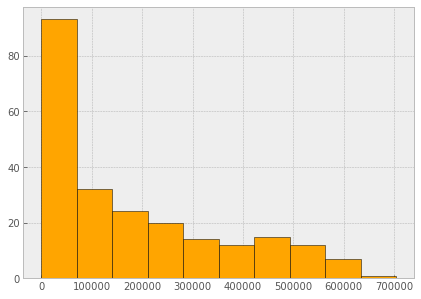

In [158]:
plt.style.use('bmh')
df["Tot Cases/\n1M pop"].hist(color= "orange",edgecolor= "black",figsize=(7,5))

<AxesSubplot:>

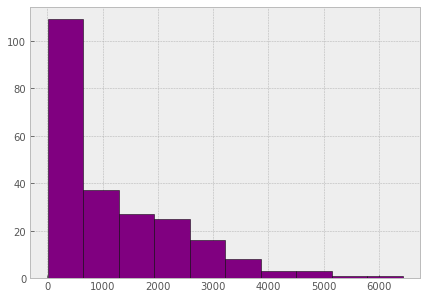

In [159]:
plt.style.use('bmh')
df["Deaths/\n1M pop"].hist(color= "purple",edgecolor= "black",figsize=(7,5))

<AxesSubplot:>

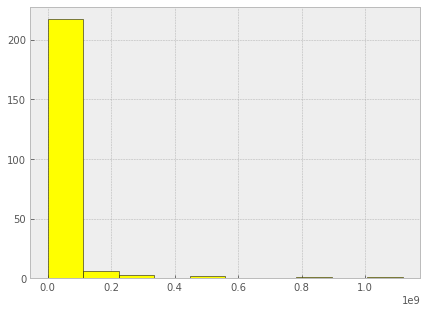

In [160]:
plt.style.use('bmh')
df["Total\nTests"].hist(color= "yellow",edgecolor= "black",figsize=(7,5))

<AxesSubplot:xlabel='Tests/\n1M pop'>

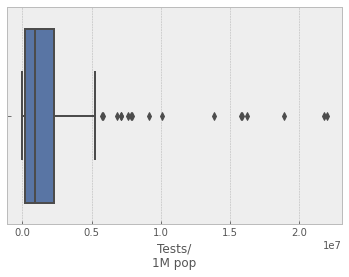

In [161]:
sns.boxplot(x="Tests/\n1M pop",data=df,palette='deep') 

<AxesSubplot:>

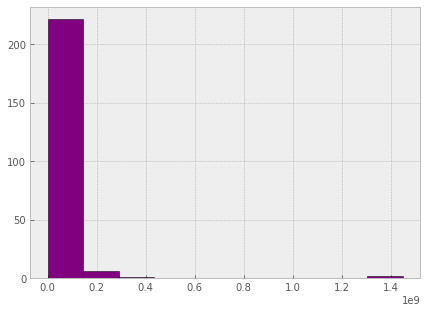

In [162]:
# plt.style.use('bmh')
df["Population"].hist(color= "purple",edgecolor= "black",figsize=(7,5))

# Univariate Analysis Observation

The analysis showed that all the coulmns(variables) are positively skewed (skewed to the right), this implies the presence of outliers and also means the mode and the median are greater than the mean in the variable, next i will treat the outliers before any futher exploration.

In [163]:
#Rename columns to remove the slashes
df.rename(columns = {'Country,\nOther':'Country'}, inplace = True)
df.rename(columns = {'Total\nCases':'TotalCases'}, inplace = True)
df.rename(columns = {'Total\nDeaths':'TotalDeaths'}, inplace = True)
df.rename(columns = {'Total\nRecovered':'TotalRecovered'}, inplace = True)
df.rename(columns = {'Active\nCases':'ActiveCases'}, inplace = True)
df.rename(columns = {'Serious,\nCritical':'CriticalCases'}, inplace = True)
df.rename(columns = {'Tot Cases/\n1M pop':'Total1MpopCases'}, inplace = True)
df.rename(columns = {'Deaths/\n1M pop':'Deaths1Mpop'}, inplace = True)
df.rename(columns = {'Total\nTests':'TotalTests'}, inplace = True)
df.rename(columns = {'Tests/\n1M pop':'Tests1Mpop'}, inplace = True)





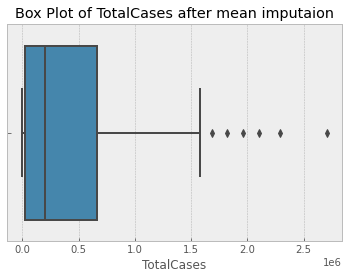

In [164]:
for i in df["TotalCases"]:
    q1= df["TotalCases"].quantile(0.25)
    q3= df["TotalCases"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["TotalCases"]= df["TotalCases"].replace(i, np.mean(df["TotalCases"]))
sns.boxplot(df["TotalCases"])
plt.title("Box Plot of TotalCases after mean imputaion")
plt.show()

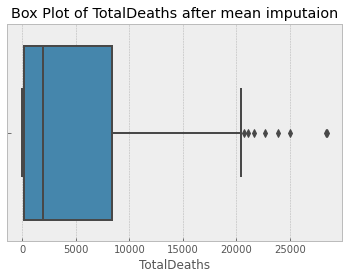

In [165]:
for i in df["TotalDeaths"]:
    q1= df["TotalDeaths"].quantile(0.25)
    q3= df["TotalDeaths"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["TotalDeaths"]= df["TotalDeaths"].replace(i, np.mean(df["TotalDeaths"]))
sns.boxplot(df["TotalDeaths"])
plt.title("Box Plot of TotalDeaths after mean imputaion")
plt.show()

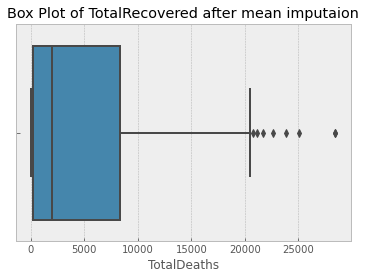

In [166]:
for i in df["TotalRecovered"]:
    q1= df["TotalRecovered"].quantile(0.25)
    q3= df["TotalRecovered"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["TotalRecovered"]= df["TotalRecovered"].replace(i, np.mean(df["TotalRecovered"]))
sns.boxplot(df["TotalDeaths"])
plt.title("Box Plot of TotalRecovered after mean imputaion")
plt.show()

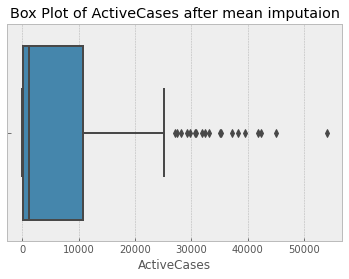

In [167]:
for i in df["ActiveCases"]:
    q1= df["ActiveCases"].quantile(0.25)
    q3= df["ActiveCases"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["ActiveCases"]= df["ActiveCases"].replace(i, np.mean(df["ActiveCases"]))
sns.boxplot(df["ActiveCases"])
plt.title("Box Plot of ActiveCases after mean imputaion")
plt.show()

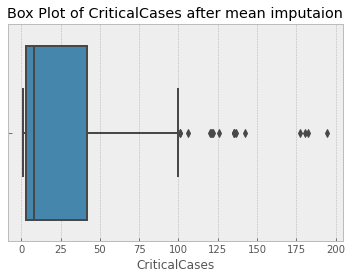

In [168]:
for i in df["CriticalCases"]:
    q1= df["CriticalCases"].quantile(0.25)
    q3= df["CriticalCases"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["CriticalCases"]= df["CriticalCases"].replace(i, np.mean(df["CriticalCases"]))
sns.boxplot(df["CriticalCases"])
plt.title("Box Plot of CriticalCases after mean imputaion")
plt.show()

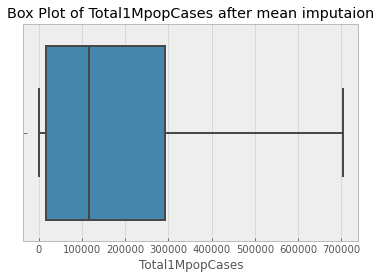

In [169]:
for i in df["Total1MpopCases"]:
    q1= df["Total1MpopCases"].quantile(0.25)
    q3= df["Total1MpopCases"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["Total1MpopCases"]= df["Total1MpopCases"].replace(i, np.mean(df["Total1MpopCases"]))
sns.boxplot(df["Total1MpopCases"])
plt.title("Box Plot of Total1MpopCases after mean imputaion")
plt.show()

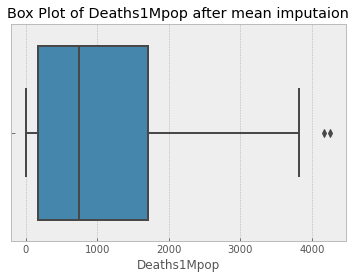

In [170]:
for i in df["Deaths1Mpop"]:
    q1= df["Deaths1Mpop"].quantile(0.25)
    q3= df["Deaths1Mpop"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["Deaths1Mpop"]= df["Deaths1Mpop"].replace(i, np.mean(df["Deaths1Mpop"]))
sns.boxplot(df["Deaths1Mpop"])
plt.title("Box Plot of Deaths1Mpop after mean imputaion")
plt.show()

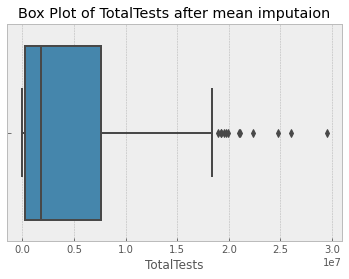

In [171]:
for i in df["TotalTests"]:
    q1= df["TotalTests"].quantile(0.25)
    q3= df["TotalTests"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["TotalTests"]= df["TotalTests"].replace(i, np.mean(df["TotalTests"]))
sns.boxplot(df["TotalTests"])
plt.title("Box Plot of TotalTests after mean imputaion")
plt.show()

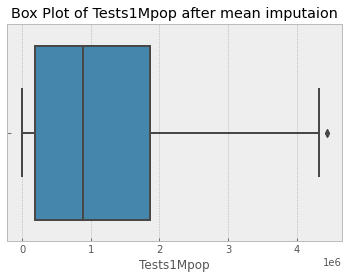

In [172]:
for i in df["Tests1Mpop"]:
    q1= df["Tests1Mpop"].quantile(0.25)
    q3= df["Tests1Mpop"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["Tests1Mpop"]= df["Tests1Mpop"].replace(i, np.mean(df["Tests1Mpop"]))
sns.boxplot(df["Tests1Mpop"])
plt.title("Box Plot of Tests1Mpop after mean imputaion")
plt.show()

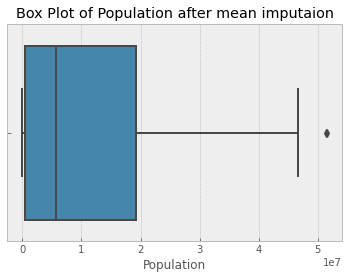

In [173]:
for i in df["Population"]:
    q1= df["Population"].quantile(0.25)
    q3= df["Population"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df["Population"]= df["Population"].replace(i, np.mean(df["Population"]))
sns.boxplot(df["Population"])
plt.title("Box Plot of Population after mean imputaion")
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='TotalRecovered', ylabel='TotalCases'>

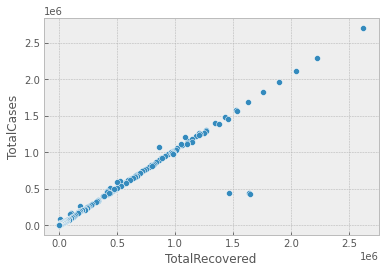

In [174]:
sns.scatterplot(x="TotalRecovered",y="TotalCases",data=df)

<AxesSubplot:xlabel='TotalCases', ylabel='TotalDeaths'>

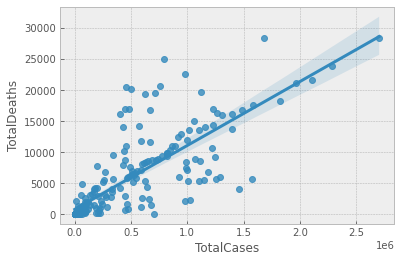

In [175]:
sns.regplot(x= "TotalCases", y="TotalDeaths", data = df)

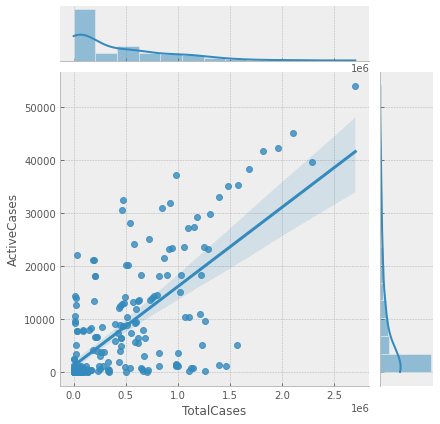

In [176]:
sns.jointplot(x='TotalCases',y='ActiveCases',data=df,kind='reg')

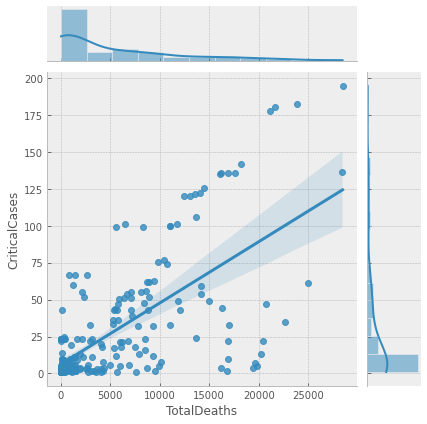

In [177]:
sns.jointplot(x='TotalDeaths',y='CriticalCases',data=df,kind='reg')

# Bivariate Analysis Observation

 A near perfect positive correlation is observed between Total case and total recovery, this means as the cases went up, recovery rate also went up. the others also showed a positive correlation, however the correlation is weak.

# Multivariate Analysis

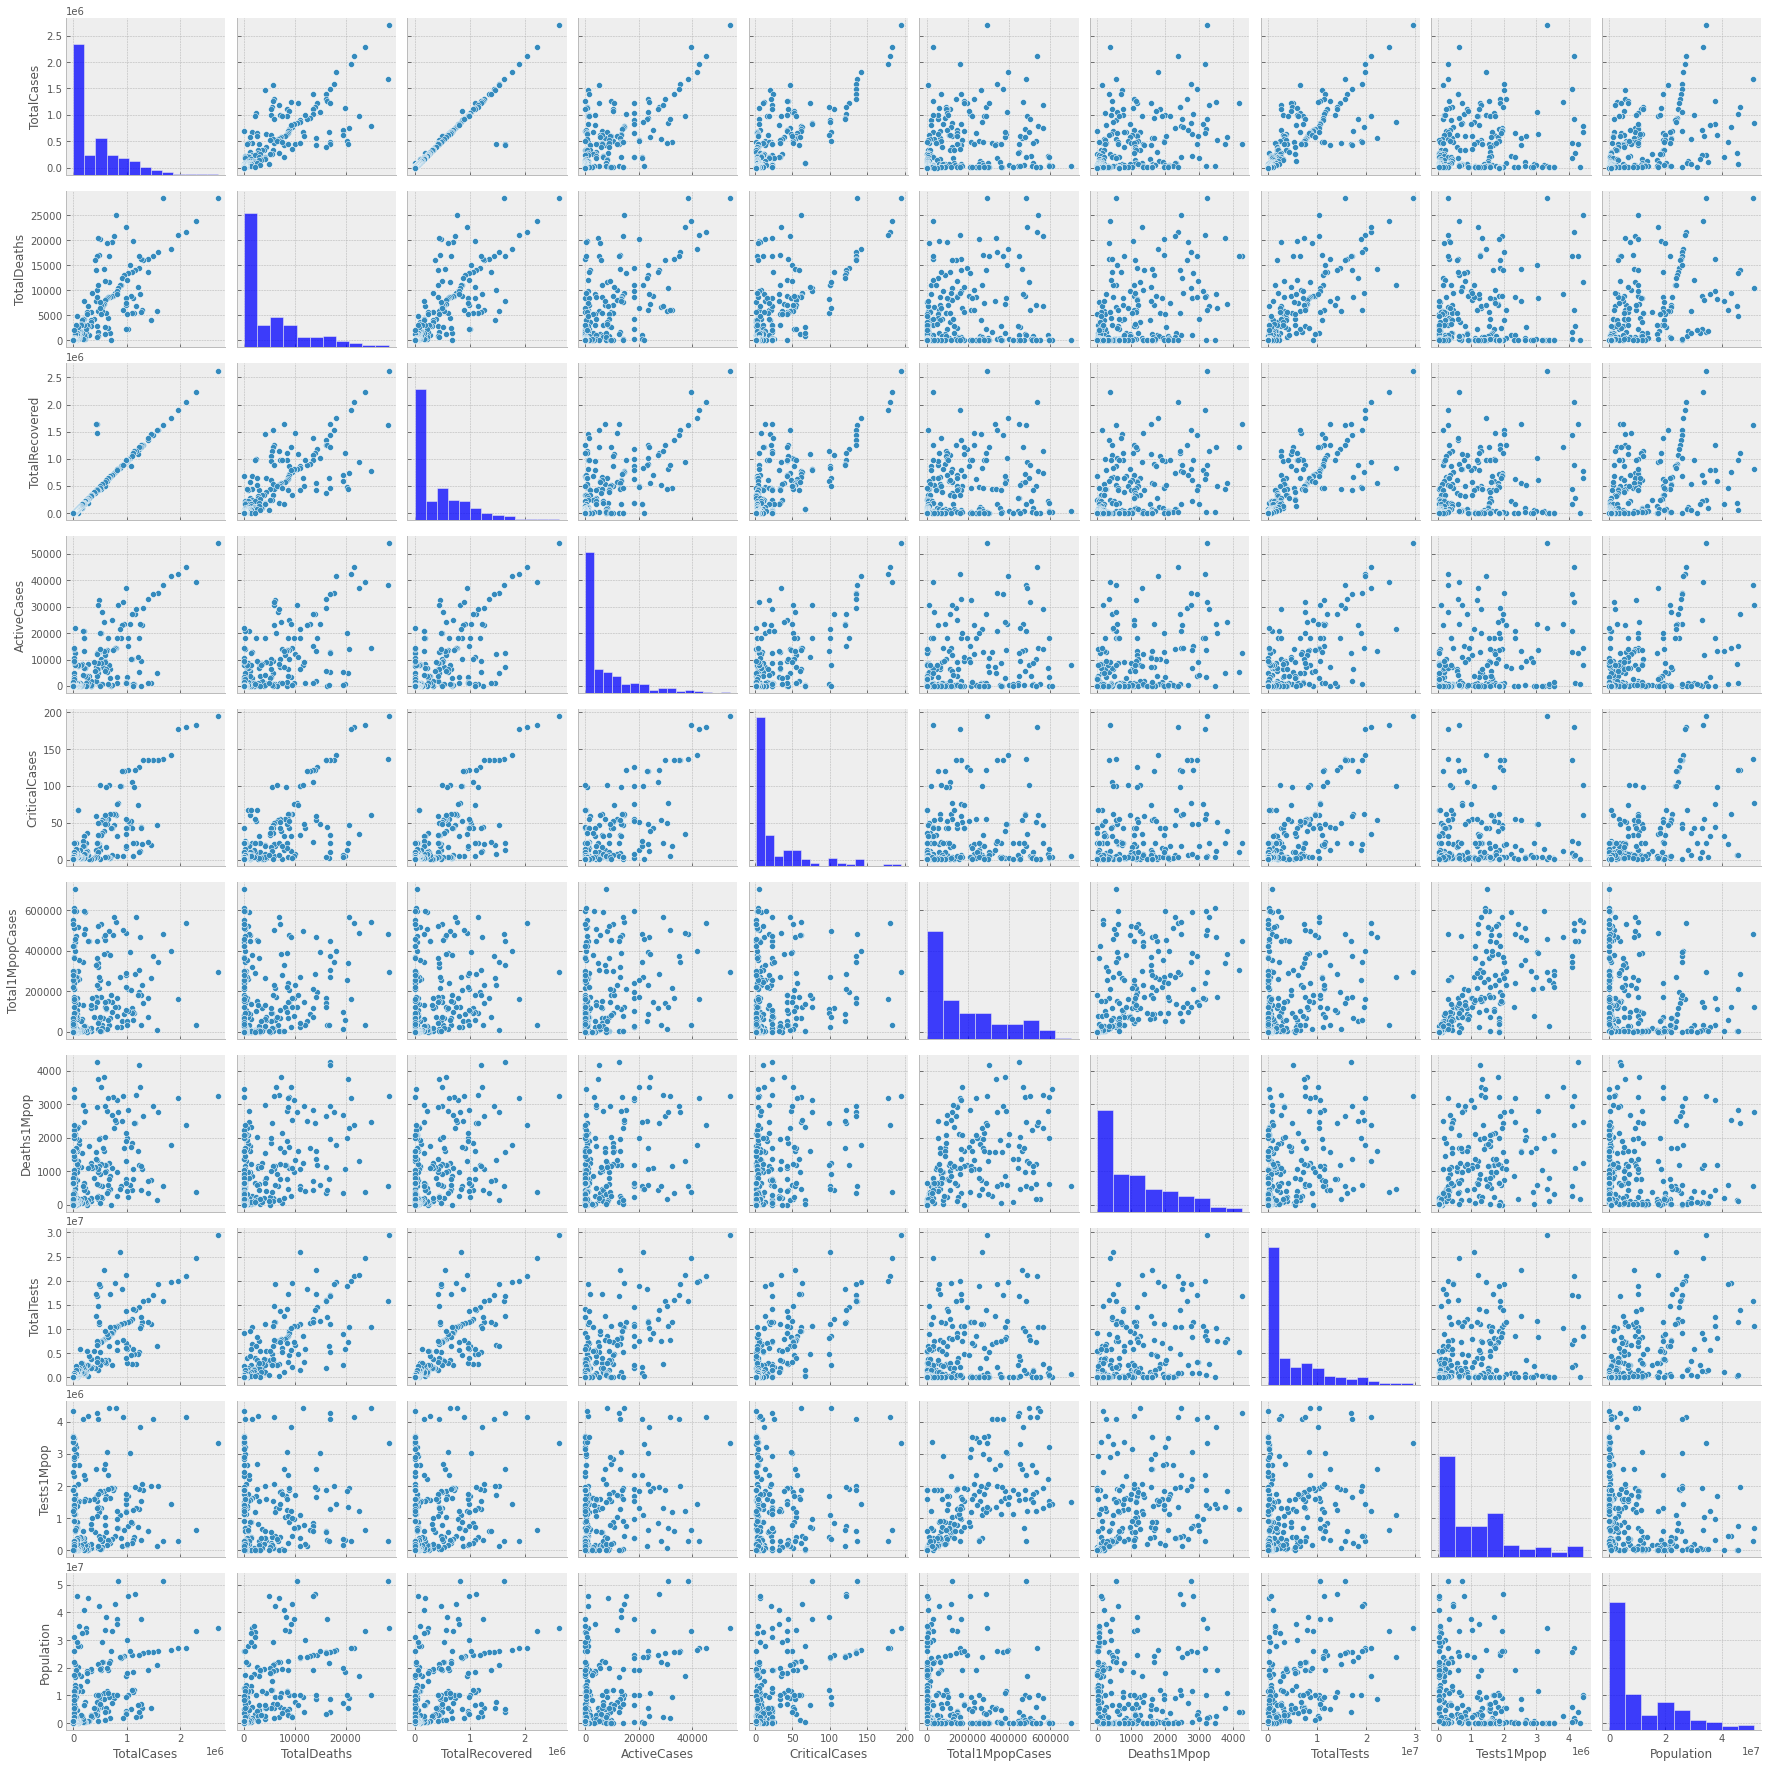

In [178]:
sns.pairplot(data=df)

<AxesSubplot:>

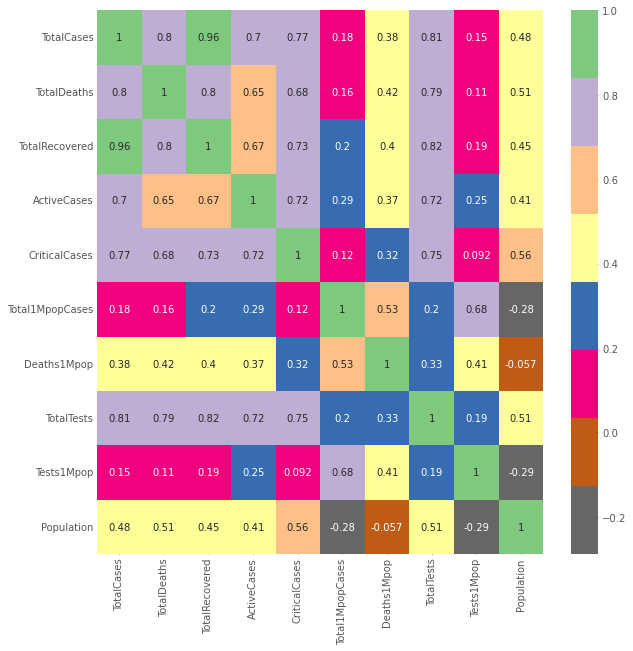

In [179]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),cmap='Accent_r',annot=True)

# Multivariate Analysis Observation

The pair plot and heatmap show the correlation between each variable in the dataset.

# Data Analysis

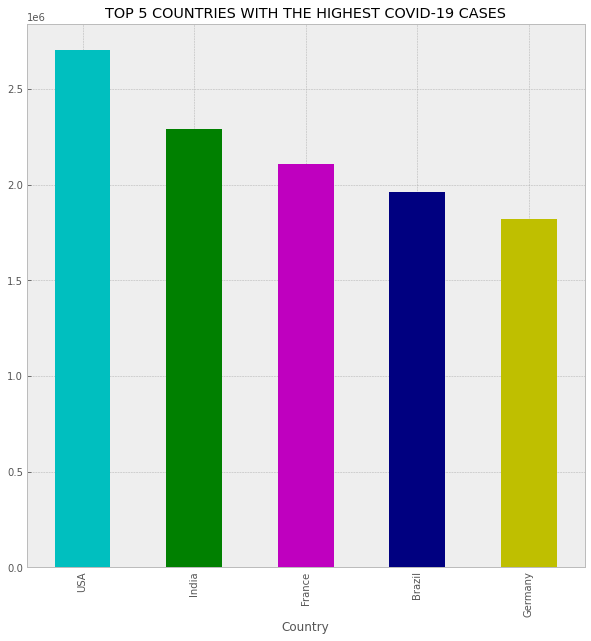

In [180]:
#top 5 Countries with the highest covid 19 case
top_5 = (df.groupby('Country')['TotalCases'].sum()).nlargest().plot(kind='bar',
        color=['c','g','m','navy','y'],title='TOP 5 COUNTRIES WITH THE HIGHEST COVID-19 CASES',
                                                        figsize=(10, 10))

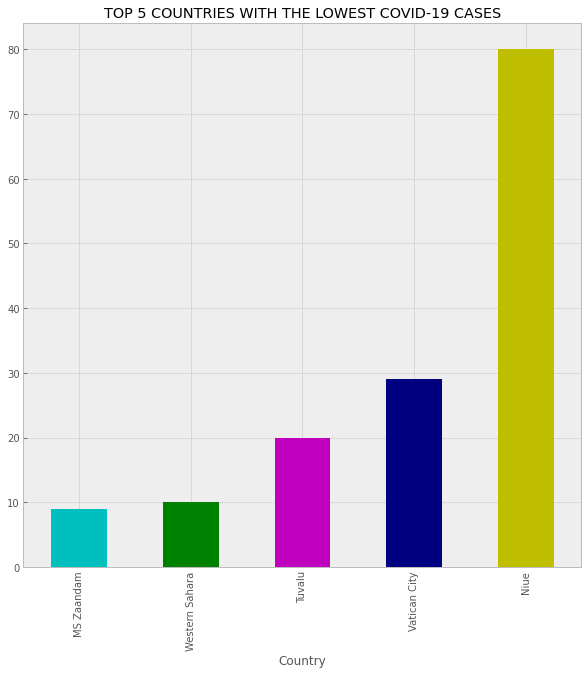

In [181]:
#Top 5 lowest countries with covid cases
lowest_5 = (df.groupby('Country')['TotalCases'].sum()).nsmallest().plot(kind='bar',
        color=['c','g','m','navy','y'],title='TOP 5 COUNTRIES WITH THE LOWEST COVID-19 CASES',
                                                        figsize=(10, 10))

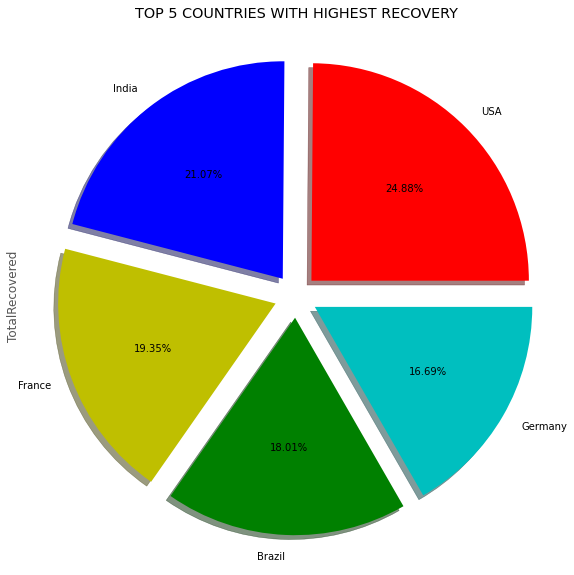

In [182]:
#Top 5 countries with highest recovery
top5 =df.groupby('Country')['TotalRecovered'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],
        title='TOP 5 COUNTRIES WITH HIGHEST RECOVERY',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[10, 10])

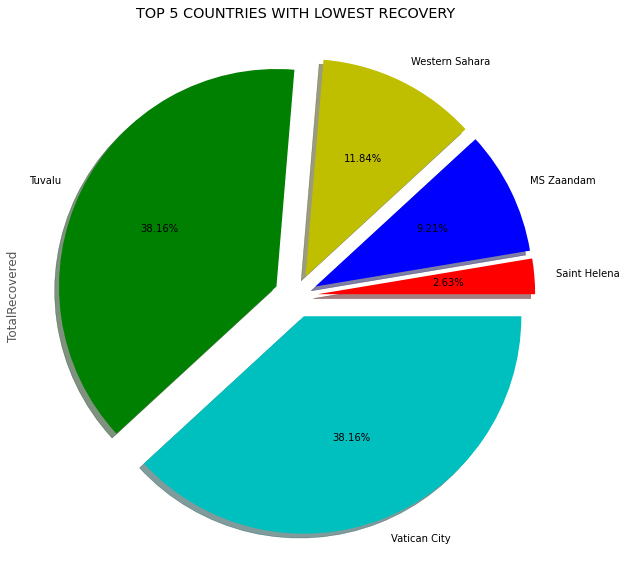

In [183]:
#Top 5 countries with lowest recovery
lowest5 =df.groupby('Country')['TotalRecovered'].sum().nsmallest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],
        title='TOP 5 COUNTRIES WITH LOWEST RECOVERY',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[10, 10])

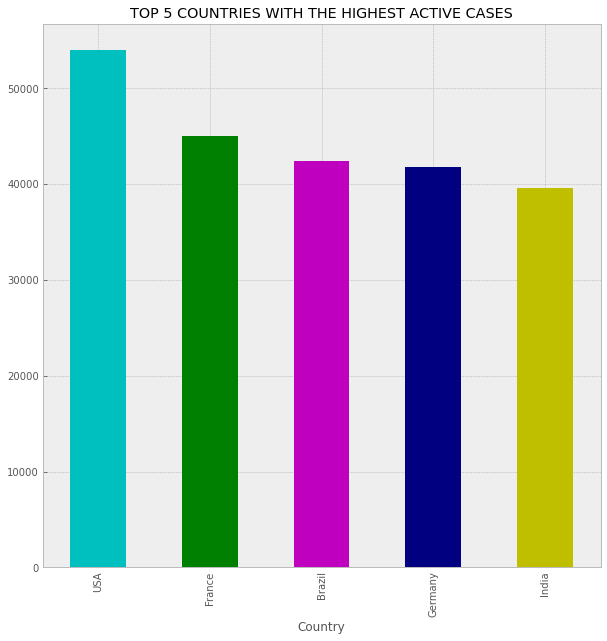

In [184]:
#top 5 Countries with the highest covid 19 case
top_5 = (df.groupby('Country')['ActiveCases'].sum()).nlargest().plot(kind='bar',
        color=['c','g','m','navy','y'],title='TOP 5 COUNTRIES WITH THE HIGHEST ACTIVE CASES',
                                                        figsize=(10, 10))

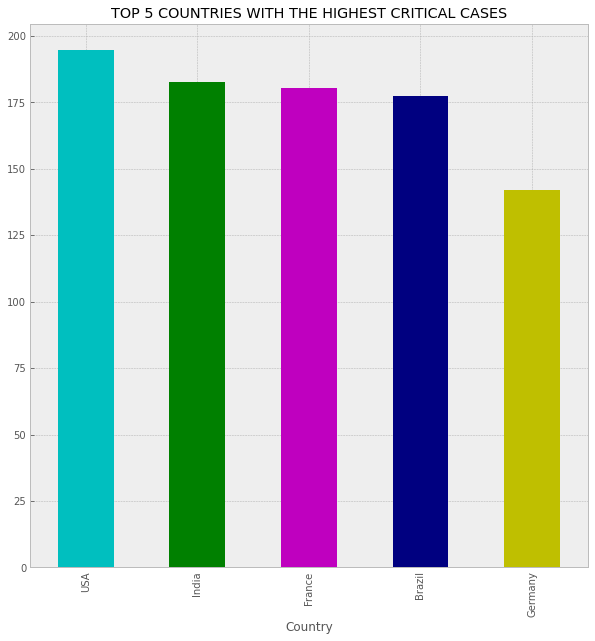

In [185]:
#top 5 Countries with the highest critical case
top_5 = (df.groupby('Country')['CriticalCases'].sum()).nlargest().plot(kind='bar',
        color=['c','g','m','navy','y'],title='TOP 5 COUNTRIES WITH THE HIGHEST CRITICAL CASES',
                                                        figsize=(10, 10))

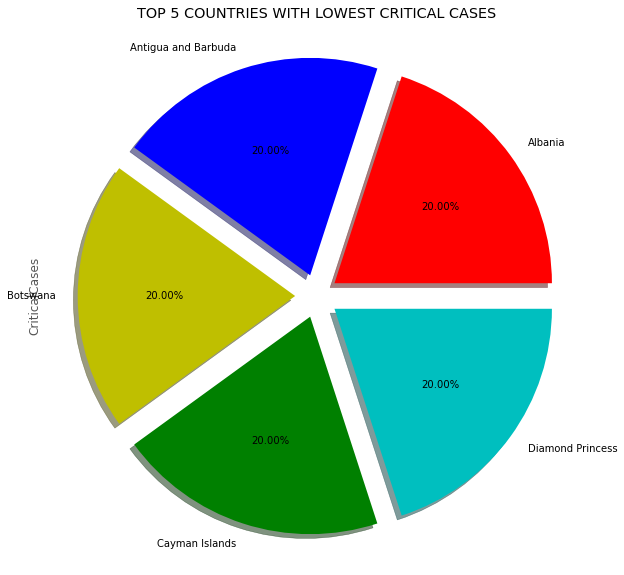

In [186]:
#Top 5 countries with lowest critical
lowest5 =df.groupby('Country')['CriticalCases'].sum().nsmallest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],
        title='TOP 5 COUNTRIES WITH LOWEST CRITICAL CASES',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[10, 10])

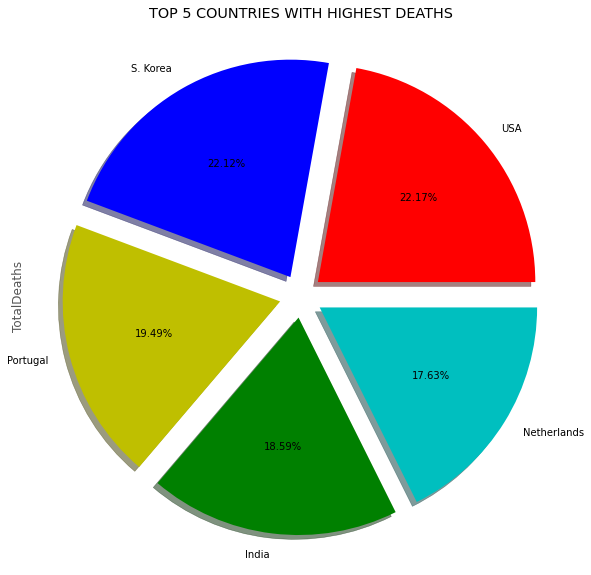

In [187]:
#Top 5 countries with highest deaths
top5 =df.groupby('Country')['TotalDeaths'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],
        title='TOP 5 COUNTRIES WITH HIGHEST DEATHS',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[10, 10])

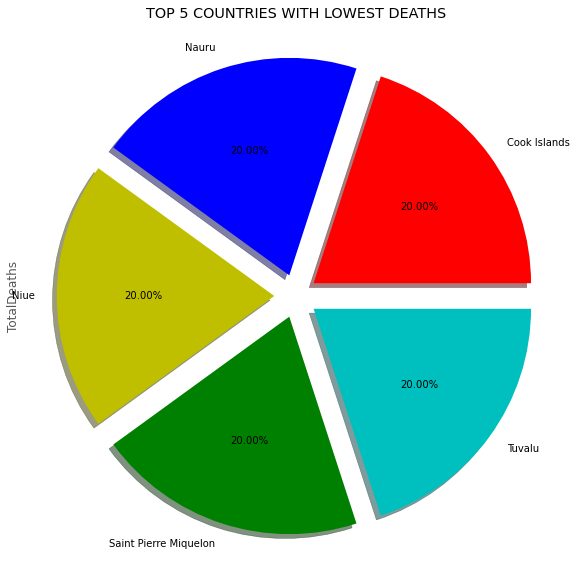

In [188]:
#Top 5 countries with lowest deaths
lowest5 =df.groupby('Country')['TotalDeaths'].sum().nsmallest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],
        title='TOP 5 COUNTRIES WITH LOWEST DEATHS',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[10, 10])